In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("dataset/cleaned_us_accident_data.csv")

In [3]:
location_features = ['start_lat', 'start_lng']
X_location = df[location_features]

In [4]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_location)
    inertia.append(kmeans.inertia_)

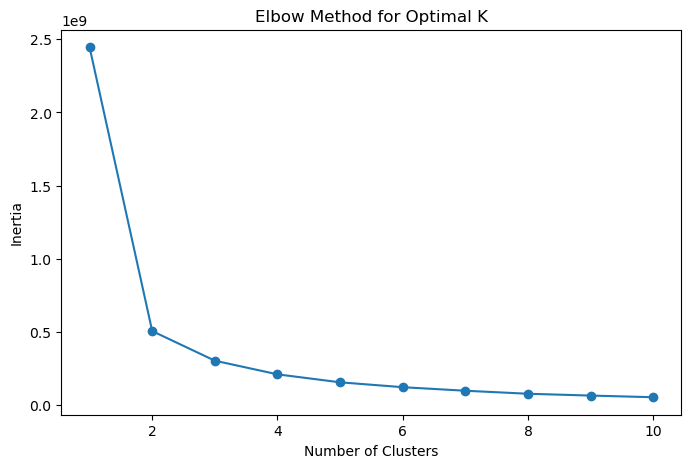

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_location)

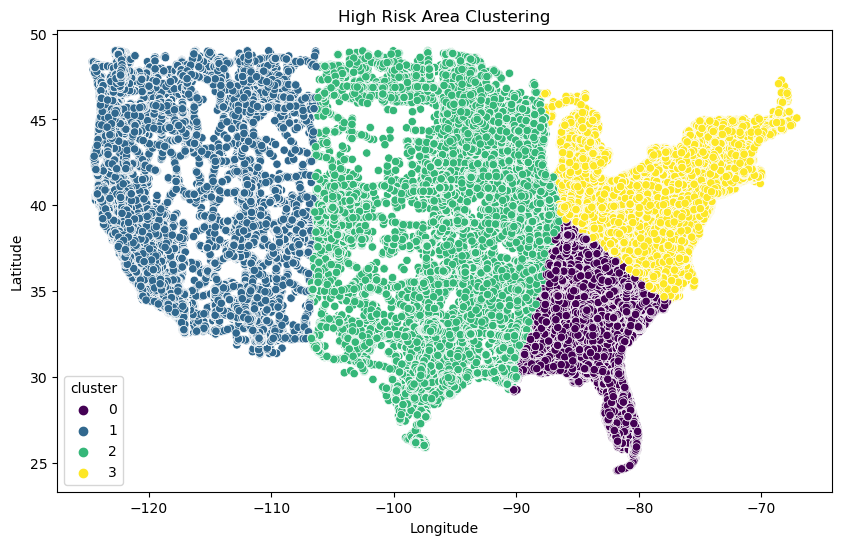

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['start_lng'], y=df['start_lat'], hue=df['cluster'], palette='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('High Risk Area Clustering')
plt.show()

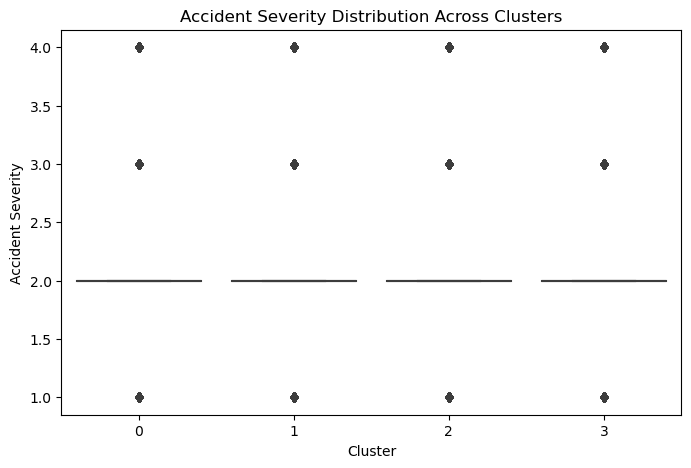

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by cluster and check severity distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['cluster'], y=df['severity'])
plt.xlabel('Cluster')
plt.ylabel('Accident Severity')
plt.title('Accident Severity Distribution Across Clusters')
plt.show()


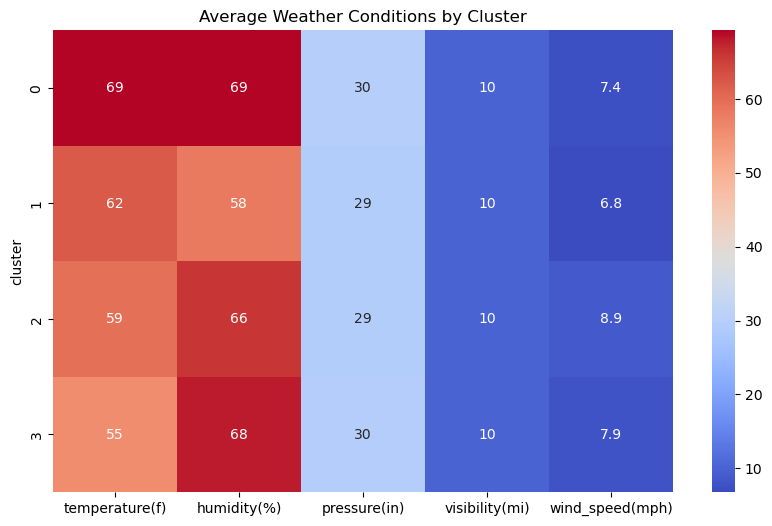

In [9]:
# Compare average weather conditions across clusters
weather_features = ['temperature(f)', 'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_speed(mph)']
weather_analysis = df.groupby('cluster')[weather_features].mean()

import pandas as pd
import matplotlib.pyplot as plt

# Display as a table
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(weather_analysis, annot=True, cmap="coolwarm")
plt.title('Average Weather Conditions by Cluster')
plt.show()


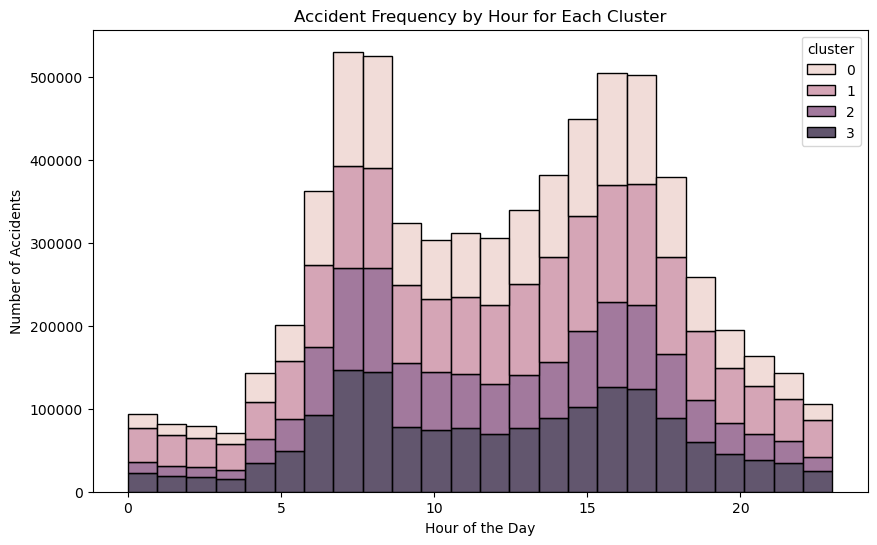

In [10]:
df['hour'] = pd.to_datetime(df['start_time']).dt.hour

# Plot accident frequency by hour for each cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hour', hue='cluster', multiple='stack', bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accident Frequency by Hour for Each Cluster')
plt.show()


In [11]:
# Find top accident-prone roads per cluster
top_roads = df.groupby(['cluster', 'street'])['severity'].count().reset_index()
top_roads = top_roads.sort_values(['cluster', 'severity'], ascending=[True, False])

# Show top 5 roads per cluster
for cluster in df['cluster'].unique():
    print(f"Cluster {cluster} - Top 5 High-Risk Roads:")
    print(top_roads[top_roads['cluster'] == cluster].head(5))
    print("\n")


Cluster 3 - Top 5 High-Risk Roads:
        cluster  street  severity
354944        3  I-95 N     36539
354945        3  I-95 S     31884
354918        3  I-90 W     11989
354773        3  I-64 E     11747
354775        3  I-64 W     11460


Cluster 1 - Top 5 High-Risk Roads:
        cluster   street  severity
180812        1    I-5 N     70339
180813        1    I-5 S     50515
180734        1   I-10 E     38428
180738        1   I-10 W     35543
180805        1  I-405 N     32136


Cluster 0 - Top 5 High-Risk Roads:
       cluster  street  severity
79343        0  I-95 S     38816
79342        0  I-95 N     37952
79309        0  I-75 N     19957
79311        0  I-75 S     19853
79201        0  I-26 W     12705


Cluster 2 - Top 5 High-Risk Roads:
        cluster  street  severity
257989        2  I-35 N     17762
258180        2  I-94 W     16527
258178        2  I-94 E     14815
257990        2  I-35 S     14379
257864        2  I-10 W     14316


